# Segmentación de una imagen
La segmentación es el campo del procesamiento de imágenes que divide una imagen digital en varias partes (grupos de pixeles)

Esto permite simplificar la representación de una imagen. Por ejemplo
- Obtener una imagen binaria.
- Obtener los bordes de una imagen.

En este tema estudiaremos un conjunto de algoritmos para determinar la mejor representación de una imagen usando  2 o 3 tonalidades de grises.

Una manera de extraer objetos o partes de una imagen es seleccionar un umbral T:
1. Si la imagen es de formato 8 bits: entonces T=[0,255]
2. Si la imagen está normalizada: T=[0,1]

Para esto, consideremos la siguiente segmentación. Sea A una imagen a escala de grises. Entonces la imagen segmentada B se obtiene de la siguiente manera:

- B(x,y) = { a_1 si A(x,y) e T_1 , a_2 si A(x,y) e T_2 , ... , a_n si A(x,y) e T_n }
    - T_1, T_2 , ... , T_n son una partición de T, es decir, T_1 u T_2 u ... u T_n = T
    - a_1 , ... , a_n son elementos en T, es decir, a_i e T, i = 1, ... , n

Ejemplo: Transofmrada Binaria
- B(x,y) = { 0 si e [0,05[ , 1 si A(x,y) e [0,5,1] }

# Cargar Paquetes

In [2]:
pkg load image

# Umbral Simple y Compuesto

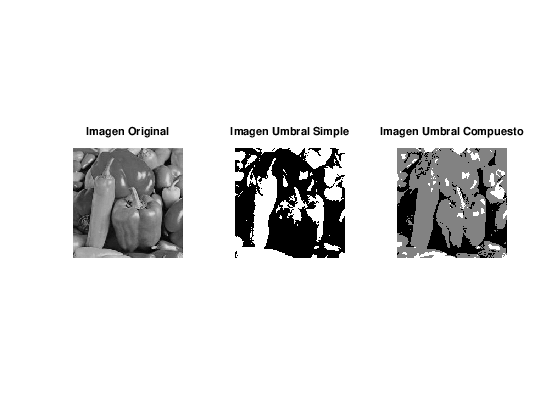

In [6]:
A = imread("images/imagen1.jpg");
subplot(1,3,1);
imshow(A);
title("Imagen Original");

A = im2double(A);
[m,n] = size(A);

%Caso 1: umbral Simple (Imagen Binaria)
T = 0.5; B = zeros(m,n);
B(A>=T) = 1; %T_1 = [0.5,1]
B(A<T) = 0; %T_2 = [0,0,0,5[
subplot(1,3,2)
imshow(B)
title("Imagen Umbral Simple")

%Caso 2: Umbral Compuesto
T1 = 1/3; T2= 2/3; C = zeros(m,n);
C(A>T2) = 1; %[0.66..,1[
C(and(T1<A,A<=T2)) = 0.5; % ]0.33...,0.66...]
C(A<=T1) = 0; %[0,0.33..]
subplot(1,3,3);
imshow(C);
title("Imagen Umbral Compuesto")

# La funcion del ruido en el procesamiento de imágenes usando umbrales

Si una imagen tiene una cantidad definida de escala de grises, el ruido en esta imagen modifica completamente este comportamiento. Este análisis se puede ver más claro usando el histograma de la imagen.

# Umbral e Histograma

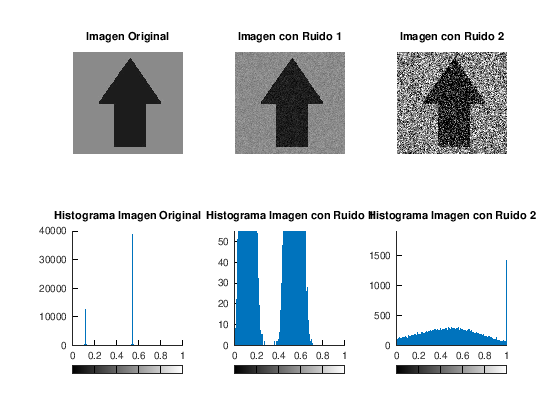

In [12]:
A = imread("images/imagen2.jpg");
A = im2double(A);
subplot(2,3,1);
imshow(A);
title("Imagen Original");

%Histograma Imagen Original
subplot(2,3,4);
imhist(A);
title("Histograma Imagen Original");

%Ruido 1
a1 = 0.2^2;
B1 = A+a1*randn(size(A));
subplot(2,3,2);
imshow(B1);
title("Imagen con Ruido 1");

%Histograma Imagen con Ruido 1
subplot(2,3,5);
imhist(B1);
title("Histograma Imagen con Ruido 1");

%Ruido 2
a2 = 0.5^2;
B2 = A+a2*randn(size(A));
subplot(2,3,3);
imshow(B2);
title("Imagen con Ruido 2");

%Histograma Imagen con Ruido 2
subplot(2,3,6);
imhist(B2);
title("Histograma Imagen con Ruido 2");

# Algoritmos para detectar el umbral óptimo
## Método de umbral Glboal Básico
- Este algoritmo se utiliza cuando los valores de los pixeles son separados en 2 grupos bien definidos. Este algoritmo se comporta de la siguiente manera:
    - Paso 1: Seleccionar un valor inicial de umbral T^(0)
    - Paso 2: Para k = 0,1,2,...
    - Paso 3: Usando T^(k), vamos a dividir la imagen en 2 bloques:
        - B1: Intensidad mayor que T^(k)
        - B2: Intensidad menor o igual que T^(k)
    - Paso 4: Calcule el promedio de intensidad de la imagen original, usando cada bloque. Sea m, el promedio usando el bloque 1 (B1) y sea m2 el promedio usando el bloque (B2)
    - Paso 5: Actualizar el valor del umbral
        - T^(k+1) = (1/2)(m1+m2)
    - Paso 6: Si |T^(k+1) - T^(k)| < tolerancia, detenerse. En caso contrario, k = k+1 y repetir los pasos del 3 al 6.

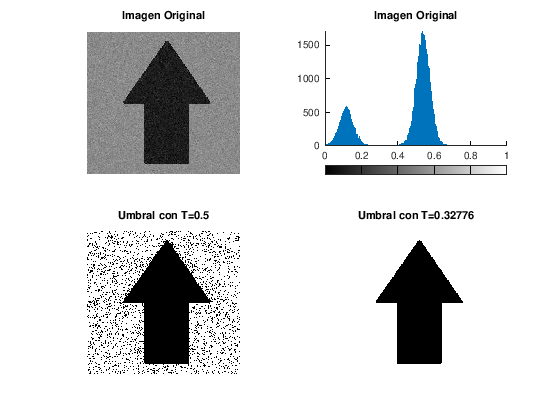

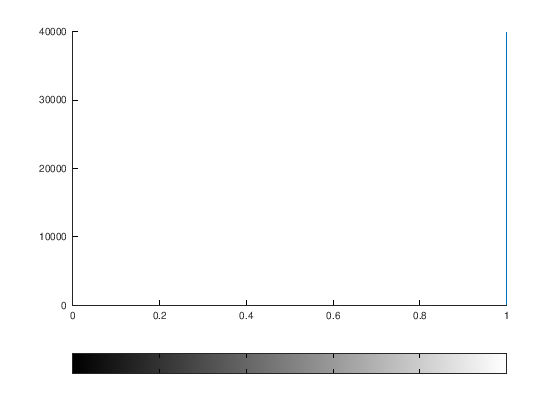

In [13]:
A = imread("images/imagen3.jpg");
A = im2double(A);
subplot(2,2,1);
imshow(A);
title("Imagen Original")

%Histograma de la Imagen Original
subplot(2,2,2);
imhist(A);
title("Imagen Original")
[x,y] = imhist(A);
ylim([0 max(x)])

[m,n] = size(A);

%Metodo 1: Umbral Simple (Binaria)
T = 0.5;
C1 = zeros(m,n);
C1(A > T) = 1;
C1(A <= T) = 0;
subplot(2,2,3);
imshow(C1);
title(["Umbral con T=" num2str(T)]);

%Metodo 2: Umbral Global Basico
%%%%IMPELMENTAR EL ERROR
iter = 15;
for i=1 : iter
    %P1: Dividir la imagen en 2 bloques
    B1 = (A>T);
    B2 = (A<=T);
    
    %Calcular el promedio de intensidad de cada bloque.
    sum1 = sum(sum(B1));
    sum2 = sum(sum(B2));
    
    G1 = zeros(m,n);
    G2 = zeros(m,n);
    
    G1 = A.*B1; %G1 tiene solo los pixeles que cumple A>T
    G2 = A.*B2; %G2 tiene solo los pixeles que cumple A<=T

    m1 = sum(sum(G1))/sum1;
    m2 = sum(sum(G2))/sum2;

    T = 0.5*(m1+m2);
end

C2 = zeros(m,n);
C2(A > T) = 1;
C2(A <= T) = 0;
subplot(2,2,4);
imshow(C2);
title(["Umbral con T=" num2str(T)]);


## Método de Otsu para determinar el valor del umbral
- Este método se tuilzia para realizar umbrales de imagenes de manera automática.
- En la forma más simple, el algoritmo devuelve un umbral de intensidad único que separa los pixeles en 2 clases: Primer plano y Fondo.
- Este umbral se determina maximizando la varianza entre clases
- Ademas, este método es más eficiente que el método del umbral básico global, porque no necesita que los valroes de intensidad esten separados en 2 bloques.

### Algoritmo de Otsu
- Valor inicial: A e R^(mxn) en escala de grises en formato de 8 bits
- Salida: Parámetro T, que representa el valor del umbral

ö = sigma

- Paso 0: Calcular el histograma de A. Sea q e R^(256) que contiene la cantidad de intensidad de la imagen A.
- Paso 1: Calcular el histograma normalizado, h e R^(256).
    - h = (1/(m*n))*q
- Paso 2: Calcular el vector de suma acumulada del histograma normalizado, p e R^(256), p=[p0,p1,...,p255], donde:
    - Pk = sum[i=0,k] (h*c_i)
- Paso 3: Calcular el vector de suma acumulada con peso:
    - (m_c)_k = sum[i=0,k] (i*h*c_i), m_c = [(m_c)_0, (m_c)_1,...,(m_c)_255]
- Paso 4: Calcular el valor máximo de m_c. Lo llamaremos m_g e R.
    - m_g = max(m_c)_k , k = 0,...,255 = (m_c)_255
- Paso 5: Calcular el vector de varianza entre clases. (ö_b)^2 e R^256.
    - ((ö_b)^2)_k = [m_g * p_k - (m_c)_k]^2 / p_k (1-p_k)
- Paso 6: El umbral óptimo es el valor donde se alcanza el máximo vector (ö_b)^2, es decir
    - (ö_b)_T = max k=0,..,255 ((ö_b)^2)_k

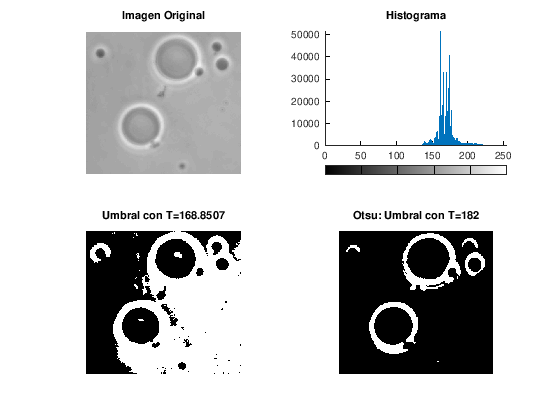

In [17]:
A = imread("images/imagen4.jpg");
subplot(2,2,1);
imshow(A);
title("Imagen Original")

%Histograma de la Imagen Original
subplot(2,2,2);
imhist(A);
title("Histograma")
[x,y] = imhist(A);
ylim([0 max(x)])

[m,n] = size(A);

%Metodo 2: Umbral Global Basico
%%%%IMPELMENTAR EL ERROR
T = 165;
iter = 15;
for i=1 : iter
    %P1: Dividir la imagen en 2 bloques
    B1 = (A>T);
    B2 = (A<=T);
    
    %Calcular el promedio de intensidad de cada bloque.
    sum1 = sum(sum(B1));
    sum2 = sum(sum(B2));
    
    G1 = zeros(m,n);
    G2 = zeros(m,n);
    
    G1 = A.*B1; %G1 tiene solo los pixeles que cumple A>T
    G2 = A.*B2; %G2 tiene solo los pixeles que cumple A<=T

    m1 = sum(sum(G1))/sum1;
    m2 = sum(sum(G2))/sum2;

    T = 0.5*(m1+m2);
end

C2 = zeros(m,n);
C2(A > T) = 1;
C2(A <= T) = 0;
subplot(2,2,3);
imshow(C2);
title(["Umbral con T=" num2str(T)]);

%Método de Otus
%Paso 0
[q,~] = imhist(A);

%Paso 1
h = (1/(m*n))*q;

%Paso 2
p = zeros (256,1);
for k=1 : 256
    p(k) = sum(h(1:k));
end

%Paso 3
mc = zeros (256,1);
for k=1 : 256
    mc(k) = sum([0:k-1]'.*h(1:k));
end

%Paso 4
mg = mc(256);

%Paso 5
vc_num = (mg*p-mc).^2;
vc_den = p.*(1-p);
sigma2b = vc_num./vc_den;

%Paso 6
[~,T] = max(sigma2b);

%Graficar
C3 = zeros(m,n);
C3(A > T) = 1;
C3(A <= T) = 0;
subplot(2,2,4);
imshow(C3);
title(["Otsu: Umbral con T=" num2str(T)]);

### TAREA
- Implementar el método de Otsu para 2 umbrales con la imagen "imagen6.jpg"